## Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)



## Import the Dataset

In [2]:
df= pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv")
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Examine the Dataset Structure

In [3]:
df.dropna()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Transform the Dataset

In [5]:
new_ocean_proximity = pd.get_dummies(df.ocean_proximity, dtype=int)
new_ocean_proximity.head()
df=df.drop("ocean_proximity", axis =1)
df[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]= new_ocean_proximity

### Create New Columns from Ratios and Quotients of Existing Columns for Improved Prediction

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

df["bedroom_ratio"] = df["total_bedrooms"] / (df["total_rooms"] + 1e-5)
df["rooms_per_person"] = df["total_rooms"] / (df["population"] + 1e-5)
df["people_per_household"] = df["population"] / (df["households"] + 1e-5)
df["income_per_person"] = df["median_income"] / (df["population"] + 1e-5)
df["rooms_per_household"] = df["total_rooms"] / (df["households"] + 1e-5)
df["bedrooms_per_household"] = df["total_bedrooms"] / (df["households"] + 1e-5)
df["income_per_household"] = df["median_income"] / (df["households"] + 1e-5)
df["rooms_to_bedrooms_ratio"] = df["total_rooms"] / (df["total_bedrooms"] + 1e-5)


df["population_density"] = df["population"] / (df["households"] + 1e-5)
df["rooms_density"] = df["total_rooms"] / (df["households"] + 1e-5)
df["bedrooms_density"] = df["total_bedrooms"] / (df["households"] + 1e-5)


df["income_longitude_interaction"] = df["median_income"] / (np.abs(df["longitude"]) + 1e-5)
df["income_latitude_interaction"] = df["median_income"] / (np.abs(df["latitude"]) + 1e-5)
df["income_geo_ratio"] = df["median_income"] / (np.abs(df["longitude"]) + np.abs(df["latitude"]) + 1e-5)
df["geo_ratio"] = np.abs(df["latitude"]) / (np.abs(df["longitude"]) + 1e-5)


df["income_times_age"] = df["median_income"] * df["housing_median_age"]
df["income_age_ratio"] = df["median_income"] / (df["housing_median_age"] + 1e-5)
df["age_per_person"] = df["housing_median_age"] / (df["population"] + 1e-5)


df["income_density"] = df["median_income"] * df["population_density"]
df["income_per_room"] = df["median_income"] / (df["total_rooms"] + 1e-5)
df["income_per_bedroom"] = df["median_income"] / (df["total_bedrooms"] + 1e-5)
df["income_per_household_room"] = df["median_income"] / (df["rooms_per_household"] + 1e-5)


df["rooms_per_income"] = df["total_rooms"] / (df["median_income"] + 1e-5)
df["population_per_income"] = df["population"] / (df["median_income"] + 1e-5)
df["households_per_income"] = df["households"] / (df["median_income"] + 1e-5)
df["rooms_income_ratio"] = np.log1p(df["total_rooms"]) / (df["median_income"] + 1e-5)


for col in ["total_rooms", "total_bedrooms", "population", "households", "median_income"]:
    df[f"log_{col}"] = np.log1p(df[col])


df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

target = "median_house_value"
num_features = [col for col in df.columns if col != target]

X = df[num_features]
y = df[target]

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_results = pd.Series(mi_scores, index=num_features).sort_values(ascending=False)

print(mi_results.head(20))


longitude                       0.401770
income_per_household_room       0.391596
median_income                   0.388270
log_median_income               0.385961
income_geo_ratio                0.381770
income_longitude_interaction    0.381733
income_latitude_interaction     0.379896
geo_ratio                       0.373215
latitude                        0.368405
rooms_income_ratio              0.329385
income_times_age                0.228245
income_density                  0.215564
INLAND                          0.196811
rooms_per_person                0.180483
bedroom_ratio                   0.140252
rooms_to_bedrooms_ratio         0.139189
income_age_ratio                0.109413
population_per_income           0.103615
rooms_per_household             0.103275
rooms_density                   0.103269
dtype: float64


### Plotting All Features’ Mutual Information Scores

In [7]:
import plotly.express as px
fig = px.bar(
    mi_results,
    x=mi_results.values,
    y=mi_results.index,
    orientation="h",
    title="Feature Importance via Mutual Information (MI)",
    labels={"x": "Mutual Information Score", "y": "Feature"},
    text=np.round(mi_results.values, 3)
)
fig.update_traces(marker_color='royalblue', textposition='outside')
fig.update_layout(
    xaxis_title="MI Score",
    yaxis_title="Feature",
    yaxis=dict(autorange="reversed"),
    template="plotly_white",
    height=600
)
fig.show()

### Selecting Features Based on Mutual Information Score > 0.2

In [8]:
selected_features =[
    "longitude",
    "income_per_household_room",
    "median_income",
    "log_median_income",
    "income_geo_ratio",
    "income_longitude_interaction",
    "income_latitude_interaction",
    "geo_ratio",
    "latitude",
    "rooms_income_ratio",
    "income_times_age",
    "income_density",
    "INLAND"
]

X = df[selected_features]
y = df["median_house_value"]

In [9]:
X.head(5)

,longitude,income_per_household_room,median_income,log_median_income,income_geo_ratio,income_longitude_interaction,income_latitude_interaction,geo_ratio,latitude,rooms_income_ratio,income_times_age,income_density,INLAND
0,-122.23,1.192016,8.3252,2.232720,0.051997,0.068111,0.219778,0.309908,37.88,0.814521,341.3332,21.275509,0
1,-122.22,1.330748,8.3014,2.230165,0.051858,0.067922,0.219266,0.309769,37.86,1.068234,174.3294,17.514641,0
2,-122.24,0.875636,7.2574,2.111110,0.045333,0.059370,0.191741,0.309637,37.85,1.004719,377.3848,20.337120,0
3,-122.25,0.970045,5.6431,1.893579,0.035247,0.046160,0.149091,0.309611,37.85,1.267156,293.4412,14.378309,0
4,-122.25,0.612271,3.8462,1.578195,0.024024,0.031462,0.101617,0.309611,37.85,1.922700,200.0024,8.390359,0


## Train-Test Split and Data Standardization

In [10]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X,y, random_state = 42, train_size = 0.85)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
stand_X_train = scaler.transform(X_train)
stand_X_test = scaler.transform(X_test)


In [12]:
import pandas as pd
pd.isna(X_train).sum()


longitude                       0
income_per_household_room       0
median_income                   0
log_median_income               0
income_geo_ratio                0
income_longitude_interaction    0
income_latitude_interaction     0
geo_ratio                       0
latitude                        0
rooms_income_ratio              0
income_times_age                0
income_density                  0
INLAND                          0
dtype: int64

## RandomizedSearchCV for Optimal Parameter Combination

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

params = {
    "hidden_layer_sizes": [(100,), (200,), (300,), (200, 100), (300, 150, 75)],
    "activation": ["relu", "tanh"], 
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate": ["constant", "adaptive"],
    "learning_rate_init": [0.001, 0.005, 0.01],
    "solver": ["adam"],
    "max_iter": [500, 1000], 
    "beta_1": [0.9, 0.95],
    "beta_2": [0.999, 0.9999],
}


model = MLPRegressor(early_stopping=True, validation_fraction=0.15, random_state=42, max_iter=500)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=50,                     
    random_state=42,
    cv = 2,
    n_jobs=-1,        
    verbose=2
)

random_search.fit(stand_X_train, y_train)
best = random_search.best_params_
score = random_search.best_score_
ls = random_search.get_params()

In [ ]:
print(best)
print(score)
print(ls)

{'solver': 'adam', 'max_iter': 1000, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (300, 150, 75), 'beta_2': 0.9999, 'beta_1': 0.9, 'alpha': 0.0001, 'activation': 'relu'}

0.6747816979140526

{'cv': 2, 'error_score': nan, 'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': True, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 500, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': 42, 'estimator__shuffle': True, 'estimator__solver': 'adam', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.15, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPRegressor(early_stopping=True, max_iter=500, random_state=42,
             validation_fraction=0.15), 'n_iter': 50, 'n_jobs': -1, 'param_distributions': {'hidden_layer_sizes': [(100,), (200,), (300,), (200, 100), (300, 150, 75)], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'adaptive'], 'learning_rate_init': [0.001, 0.005, 0.01], 'solver': ['adam'], 'max_iter': [500, 1000], 'beta_1': [0.9, 0.95], 'beta_2': [0.999, 0.9999]}, 'pre_dispatch': '2*n_jobs', 'random_state': 42, 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 2}

## Define the Model and Fit It to the Dataset

In [13]:
from sklearn.neural_network import MLPRegressor

best_params = {
    'solver': 'adam',
    'max_iter': 2000,
    'learning_rate_init': 0.001,
    'learning_rate': 'adaptive',
    'hidden_layer_sizes': (300, 150, 75),
    'beta_2': 0.9999,
    'beta_1': 0.9,
    'alpha': 0.0001,
    'activation': 'relu',
    'early_stopping': False,
    'random_state': 42
}

model = MLPRegressor(**best_params)
model.fit(stand_X_train, y_train)
y_pred = model.predict(stand_X_test)


## Model Evaluation

In [14]:
from sklearn.metrics import r2_score, median_absolute_error

print(f"R2 Score: {r2_score(y_test,y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_test,y_pred)}")

R2 Score: 0.7035804627235993
Median absolute error: 26098.75003588252


## Plotting the Learning Curve

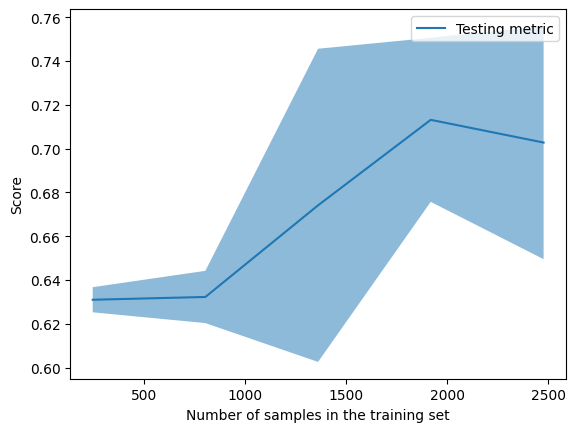

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    model, stand_X_train, y_train)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

## Plotting True vs. Predicted Values

In [15]:
from sklearn.metrics import r2_score
import plotly.express as px

y_pred = model.predict(stand_X_test)
r2 = r2_score(y_test, y_pred)

fig = px.scatter(
    x=y_test, 
    y=y_pred,
    title=f"MLPRegressor Predictions vs Actual Values (R² = {r2:.3f})",
    labels={"x": "Actual Values", "y": "Predicted Values"},
    opacity=0.6
)
fig.add_shape(
    type="line", x0=y_test.min(), y0=y_test.min(), x1=y_test.max(), y1=y_test.max(),
    line=dict(color="red", dash="dash")
)
fig.update_traces(marker=dict(size=6, color="royalblue"))
fig.update_layout(template="plotly_white", height=600)
fig.show()


## Plotting the Loss Curve

In [16]:
import plotly.express as px

fig = px.line(y=model.loss_curve_, title='MLPRegressor Loss Curve')
fig.update_layout(xaxis_title='Iteration', yaxis_title='Loss')
fig.show()
